# Project:The Movie Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be analysing __The Movie Database (TMDB)__ which is a collection of 10,000 movies of different genres collected over a period of fifty years. The database give details about the gnere of the movie, the amount expended and corresponding revenue, the release date and year as well as the title. Other information provided are the popularity, directors, cast, homepage, amongst other relevenat information.

> I chose this topic based on my interest in movies as this is my preferred relaxation tool

#### Insight of Terminologies

- Genre: This refers to the class of the movie. Movies that share similar characteristics and features are grouped into thesame genre.
- Cast: This terminology refers to the actors and actresses in the movie
- Homepage: Website of the movie
- runtime: The duration of the movie
- Directors: They have a general control of the day-to-day activities of the movie production
- Budget: The total amount of money allocated to produce the movie
- Revenue: The total amount generated from the movie after production. This can be through sales of the movie, cinema patronage, etc
- Original Title: The name given to the movie at the initial time of production
- Production companies: The companies responsible for the movie production
- Tagline: The movie's advertising slogan which gives a quick insight into the movie plot, theme, etc. This enables viewers to have an overview of the movie before making a choice
- imdb_id: This is the film's identity in the internet movie database (a database that provides information about movies and tv series) 
       
              
This project entails the analysis of the information gathered from The Movie Database. 10,000 movies were analysed for information such as revenue, genre, ratings, budget, etc.

At the end of the analysis, I will like to address the two questions below; 
- find out the count of the movies by within a period of time and the corresponding release rate per year
- the characteristics of movies with high revenue.

In [36]:
# Importing all the libraries needed for the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Data Wrangling

> This section of the project will involve loading of the data set, assessing the data, dropping unwanted columns and rows (if any) and finally prepare the entire data for further analysis.

### General Properties

In [37]:
# Loading the data and a summary of the 1st 5 data set

df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> An overview of the dataframe shows uniformity in the naming of the columns (all columns with two words are separated with an underscore(_)), consistency in the year of the release_date and release_year.

In [38]:
# Checking the number of row and columns as well as the number of duplicated data

print(df_tmdb.shape)
print(sum(df_tmdb.duplicated()))

(10866, 21)
1


> The data set is made up of 10866 rows and 21 columns. Also, there is one duplicated data which will be removed during the data cleaning stage to have a cleaner dataset.

In [39]:
# Checking for the identity of the duplicated data

df_tmdb.loc[df_tmdb.duplicated(), :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [40]:
# checking the distribution (min, max, mean, etc) of the dataset

df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **The above data statistical distribution shows the following;**
- Average budget expended and revenue is about 1.46e+07 and 3.98e+07. This shows that the average revenue generated was double of the average budget.
- The average runtime is 102 and maximum runtime is 900 which seems to be an outlier
- The entire movies were released between 1960 and 2015

In [41]:
# Checking the data tpyes

df_tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> __From the above data types, it is clearly evident that there only three types of data which are;__
- int64 - Integers (Numbers without a decimal)
- float64 - Numbers with decimals
- object - These are either strings or lists

In [42]:
# checking the columns with missing data

df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> The data information reveals that the following columns have missing data; **imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies**, etc. These columns will be dropped since they will not be for answering the questions.

In [43]:
# Sorting/Arranging the data in order of decreasing revenue

df_tmdb.sort_values(by=['revenue'], inplace=False, ascending=False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Cleaning the dataset

> __The following cleaning exercises will be carried out;__
- Removing duplicated row
- Droping columns with missing data

In [44]:
# Dropping duplicated row which was confirmed during the data assessment done above

df_tmdb.drop_duplicates(inplace=True)


In [45]:
# Checking the sum of duplicates and the shape of the dataset to confirm duplicated row has been dropped

print(sum(df_tmdb.duplicated()))
df_tmdb.shape

0


(10865, 21)

> __The above exercise shows that;__

- The sum of duplicates is zero (0) which affirms the dropping of duplicated row.
- The new dataset has 10865 rows against 10866 rows which we started with. This further confirms the dropping of the duplicated row

In [46]:
# Removing columns not needed to asnwer the two questions highlighted during the introduction

df_tmdb_A = df_tmdb.drop(['homepage', 'tagline', 'imdb_id', 'keywords', 'director', 'overview', 'genres', 'cast', 'production_companies'], axis=1, inplace=True)

In [47]:
df_tmdb.shape

(10865, 12)

> __The new dataset has 12 columns which confirms that the unwanted columns have been removed__

In [48]:
# Checking the new dataset for columns with missing values

df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   runtime         10865 non-null  int64  
 6   release_date    10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
 10  budget_adj      10865 non-null  float64
 11  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


__The above shows that there are no columns with missing data__

### Cleaning Conclusion

> __From the info of the cleaned dataset above, it is evident that all columns have complete dataset. I will now proceed to the next section by addressing the questions presented__

<a id='eda'></a>
## Exploratory Data Analysis

> This section will answer the two questions from the introductory section.

### Research Question 1: Which release_year Year Has the Highest Popularity

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

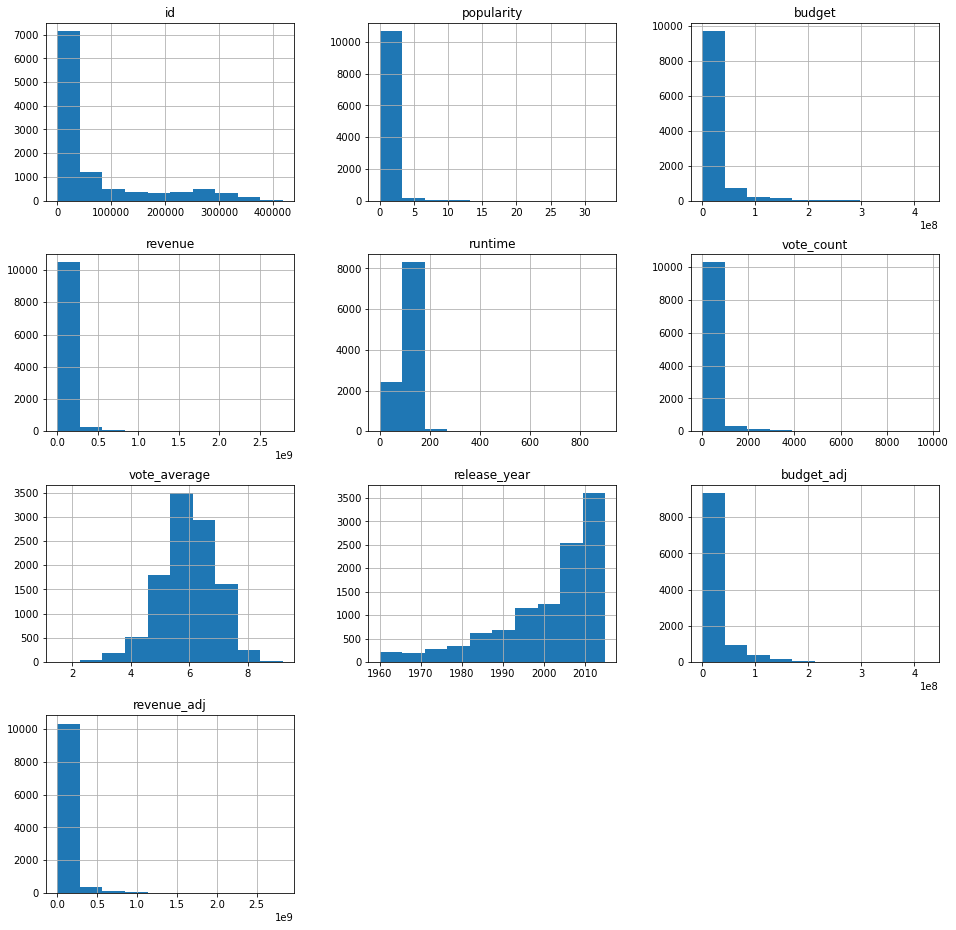

In [49]:
# Using the histogram to have a pictorial overview of the cleaned dataset

df_tmdb.hist(figsize=(16,16))


> **From the above histogram, the following can be inferred;**
- There seem to be a relationship between the budget and revenue generated as both are skewed to the right.
- Also, the popularity chart shares similar trend with the budget and revenue chart which suggests a relationship'
- More movies tend to be released as the year progresses. The release_year histogram shows continuous growth as the year progresses.
- A signifant amount of the movies had their runtime between 0 and 200

#### The cells below will help answer the 1st question

In [50]:
# I will group the release_year into 4 groups. This will be achieved by creating a bin. I will use the describe function as guide to get the bin data

df_tmdb['release_year'].describe()

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

In [51]:
# The min, 25%, 50%, 75% and max figures will be my bin edges. I will also name the bins
# Old = 1960 - 1995
# Slightly_old = 1996 - 2006
# Slightly_recent = 2007 - 2011
# Recent = 2011 - 2015


bin_edges = [1960, 1995, 2006, 2011, 2015]
bin_names = ['old', 'slightly_old', 'slightly_recent', 'recent']

In [52]:
# Creating a column for the grouping of the movies. This new column will be called movie_rating

df_tmdb['movie_rating'] = pd.cut(df_tmdb['release_year'], bin_edges, labels=bin_names)
df_tmdb.head()

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_rating
0,135397,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,recent
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,recent
2,262500,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,recent
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,recent
4,168259,9.335014,190000000,1506249360,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,recent


> __A new column called "movie_rating" has been created. This is the last column on the dataframe__ 

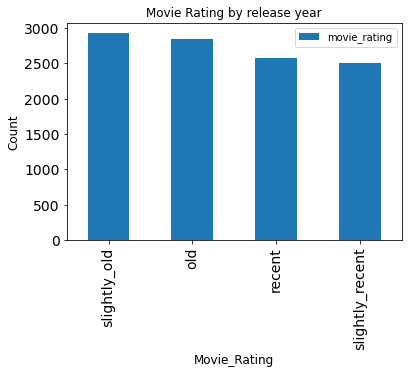

In [53]:
# A bar chart of the movie_rating will be plotted.
# This will show us the release_year by count based on the bins that have been created.

df_tmdb['movie_rating'].value_counts().plot(kind='bar', title='Movie Rating by release year', fontsize=14)
plt.xlabel('Movie_Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()


> __From the above bar chart, we can draw the following conclusion;__
- The highest number of movies were released between 1995 and 2006 which is about 2,900 movies. This happened within 11 years at an average of about 264 movies per year
- About 2,800 movies were released between 1960 and 1995 which is almost within a 35 year duration. This ia at an average of about 80 movies per year
- Between 2011 and 2015, about 2,600 movies were released averaging about 520 movies per year
- About 2,500 movies were released between 2006 and 2011 at an average of about 417 movies per year.

### Research Question 2: Properties of movies with high revenue

> This question will be answered by using a scatter plot. Two variables will be considered (bugdet and popularity) based on the general overview from the histogram above


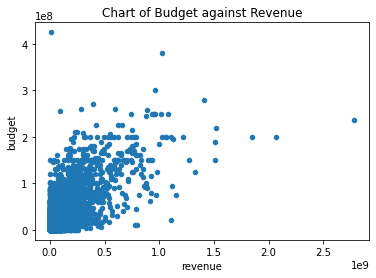

In [54]:
# A scatter plot of budget against revenue

df_tmdb.plot(x='revenue', y='budget', kind='scatter', title='Chart of Budget against Revenue');

In [55]:
# defining the function for correlation coefficient 

def corr(x,y):
    output = print(np.corrcoef(x,y))
    return output

In [56]:
# To get the correlation coefficient of the scatter plot of budget against revenue;

x = np.array(df_tmdb['revenue'])
y = np.array(df_tmdb['budget'])
corr(x, y)

[[1.         0.73492798]
 [0.73492798 1.        ]]


#### From the above chart, the following can be deduced;
- There is a positive relationship between budget and revenue as seen by a correlation coefficient of 0.73492798.
- As budget increases, revenue increases also. However, this does not imply that increase in budget is directly responsible for increase in revenue

#### The next chart will also assess the relationship between vote_count and popularity

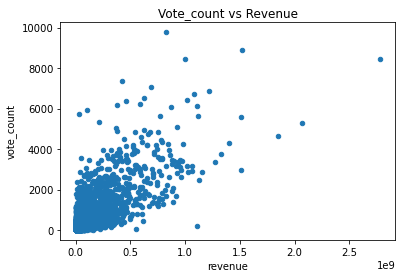

In [57]:
# A scatter plot of popularity against revenue

df_tmdb.plot(x='revenue', y='vote_count', kind='scatter', title='Vote_count vs Revenue');

In [58]:
# To get the correlation coefficient of the scatter plot of popularity against revenue;

x = np.array(df_tmdb['revenue'])
y = np.array(df_tmdb['vote_count'])
corr(x, y)

[[1.         0.79117437]
 [0.79117437 1.        ]]


#### The plot of vote_count against revenue tells us the following;
- The correlation coefficient of 0.79117437 tells us that vote_count and revenue have a positive relationship.
- vote_count and revenue increases simultaneously. Nevertheless, more investigation will have to be done to ascertain if vote_count is responsible for increasing revenue.

<a id='conclusions'></a>
## Conclusions
#### Research Question 1

>  From the above analysis, movies grouped as slightly old had the highest release count of about 2,900 but low release per year of 264 movies. 

> Movies grouped as recent has a faily low release count of about 2,600 when compared to the slightly old movies. However, it had the highest release rate per year of about 520

**Limitation**
> More information on the geographical location will help know what could have caused the variation in the number of movies released


#### Research Question 2

> Two properties of movie with high revenue are high budget and high vote_count

> Both properties showed positive relationship with revenue as evident in the correlation coefficient of both scatter plot.

**Limitations**

> The data did not give information on the currency of the revenue and budget. A variation in the currency can affect our analysis significantly

> A breakdown of the revenue source was not indicated which could really help in segmenting the impact of vote_count and budget on revenue



### References

 - https://medium.com/analytics-vidhya/scatterplot-and-best-fit-line
 - https://syntaxfix.com/
 - https://www.python-graph-gallery.com/
 - https://www.intellspot.com/scatter-plot/
 - https://stackoverflow.com/